# CODSOFT INTERNSHIP

# TASK - 4: Sales Prediction Using Python

**Author: GARIKAPUDI MAHESH**

**Domain: Data Science**

**Batch: October B58**

# AIM



---
The aim of this project is to develop a machine learning model using Python to predict future sales based on various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. By accurately forecasting sales, businesses can make data-driven decisions to optimize marketing strategies, allocate budgets efficiently, and maximize overall sales performance.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Dataset.csv to Dataset.csv


In [9]:
import io
data=pd.read_csv((io.BytesIO(uploaded['Dataset.csv'])))

In [10]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [11]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [12]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [14]:
X = data.drop("Sales", axis=1)
y = data["Sales"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\n📈 Model Evaluation Results:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


📈 Model Evaluation Results:
R² Score: 0.906
MAE: 1.275
MSE: 2.908
RMSE: 1.705


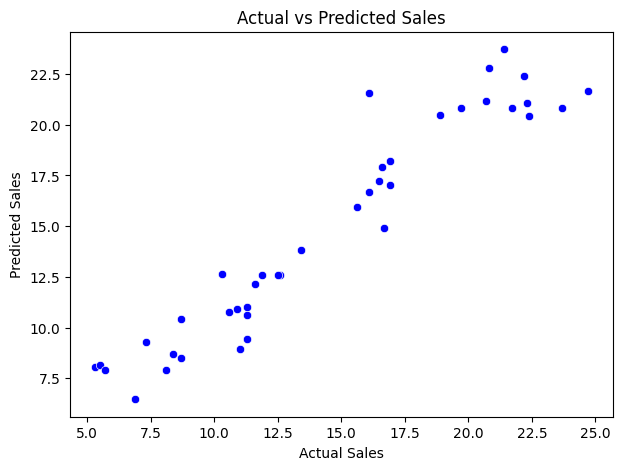

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [24]:
new_data = pd.DataFrame({
    'TV': [250], # Changed to match the training data feature name and scaled down the value
    'Radio': [12], # Changed to match the training data feature name and scaled down the value
    'Newspaper': [15] # Changed to match the training data feature name and scaled down the value
})

new_prediction = model.predict(new_data)
print(f"\nPredicted Future Sales: {new_prediction[0]:.2f}")


Predicted Future Sales: 19.62


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0
